# Data Cleaning Core [Starter Notebook]



- Student Name: Rahaf Hosari

## The Data

You will be working with a modified version of the Titanitc dataset:

- [(Modified) Titanic Data](https://drive.google.com/file/d/1Uw7RzQMYSARCFnzJQqqNlZpUouXr16-8/view?usp=sharing)

- [Data Dictionary](https://docs.google.com/document/d/1uEeANvKURYmu-HUDGzbGlMmvAUwooatUg-gHUCDMh-Y/edit?usp=sharing)

___

- Save the files to your Course 1 > Week 2 > Data Folder.


## A) Load and Preview Data


- Mount google drive and navigate to the file on the Files sidebar.


In [195]:
# Mount google drive

In [196]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [197]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



- Navigate to the file on the Files side bar and copy the path
- Paste it below and save it as a variable called "fpath"

In [198]:
# Import required packages
import pandas as pd
import numpy as np
import missingno as msno #Required in G.3

# Save the filepath and load the data as "df_titanic"
url = "/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week03/Data/titanic_dirty.csv"
df = pd.read_csv(url)

In [199]:
# Display the first 5 rows
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.28,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.93,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.10,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


In [200]:
# Display the last 5 rows
df.tail()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
901,622,623,1,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,$15.74,NaN,C
902,77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,$8.05,NaN,S
903,715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,$7.65,F G73,S
904,623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,$7.85,NaN,S
905,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,$23.45,NaN,S


- Display summary information (including dtypes, number of rows, number of columns).


In [201]:
# Display the info for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   906 non-null    int64  
 1   PassengerId  906 non-null    int64  
 2   Survived     906 non-null    int64  
 3   Pclass       906 non-null    int64  
 4   Name         906 non-null    object 
 5   Sex          906 non-null    object 
 6   Age          723 non-null    float64
 7   SibSp        906 non-null    object 
 8   Parch        906 non-null    int64  
 9   Ticket       906 non-null    object 
 10  Fare         906 non-null    object 
 11  Cabin        207 non-null    object 
 12  Embarked     904 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 92.1+ KB


**Scan the .info() to answer the following questions about the data:**

>Add your answers in this Markdown cell, right below each question:

**Q: A1) How many rows are there?**
- Your Answer:
  - `906`

**Q: A2) How many columns are there?**
- Your Answer:
  - `13`


In [202]:
#Alternatively we can use.shape which will display (rows, columns)
df.shape

(906, 13)



**Q: A3)How many numeric columns?**
- Your Answer:
  - `6`

**Q: A4) How many categorical/string columns are there (dtype='object')?**
- Your Answer:
  - `7`

## B) Check Data Types and Convert (if required)


> Notice there are several columns with "object" datatype.

- **Use select_dtypes to view only the object columns**


In [203]:
#All data types
df.dtypes

,0
Unnamed: 0,int64
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,object
Parch,int64
Ticket,object


In [204]:
# Use .select_dtypes to view only object columns
df.select_dtypes(include=object)

,Name,Sex,SibSp,Ticket,Fare,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,1,A/5 21171,$7.25,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,PC 17599,$71.28,C85,C
2,"Heikkinen, Miss. Laina",female,0,STON/O2. 3101282,$7.93,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,113803,$53.10,C123,S
4,"Allen, Mr. William Henry",male,0,373450,$8.05,NaN,S
5,"Moran, Mr. James",male,0,330877,$8.46,NaN,Q
6,"McCarthy, Mr. Timothy J",male,0,17463,$51.86,E46,S
7,"Palsson, Master. Gosta Leonard",male,3,349909,$21.08,NaN,S
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,347742,$11.13,NaN,S
9,"Nasser, Mrs. Nicholas (Adele Achem)",F,1,237736,$30.07,NaN,C


- Inspect the values in each column to confirm if they should be converted to numeric dtypes and answer the following questions:




**Q: B1) Which columns should be converted to a numeric dtype?**  (Hint: there are 2 columns that need to be converted)
- **Your Answer:**
  - `SibSp`
  - `Fare`
    




### Convert Dtypes

#### Convert Fare

In [205]:
# Inspect the Fare column's value counts
pd.set_option('display.max_rows',None)
df['Fare'].value_counts().sort_values(ascending=False)

,count
Fare,
$8.05,45
$13.00,42
$7.90,38
$7.75,35
$26.00,31
$7.23,27
$10.50,24
$7.93,19
$7.78,18




>In a Markdown cell below your displayed info, answer the following questions:

**Q: B2)  Do you see any values that are string characters that need to be replaced?**
- Your Answer:
  - `The dollar sign $`

**Q: B3) If so, do you need to replace a single part of a string (`df[col].str.replace`) or an entire value (`df[col].replace`)?**
- Your Answer:
  - `A single part using df['Fare'].str.replace("$",'')`

**Perform the necessary steps to convert to numeric dtype:**

- 1) Replace/remove the non-numeric values.

In [206]:
# Remove  the "$" from fare column by replacing it with nothing
df['Fare'] = df['Fare'].str.replace("$",'')
# Check the .value_counts to confirm the change
df['Fare'].value_counts().sort_values(ascending=False)

,count
Fare,
8.05,45
13.00,42
7.90,38
7.75,35
26.00,31
7.23,27
10.50,24
7.93,19
7.78,18



- 2) Convert the column to a float dtype.

In [207]:
# Change the datatype of Fare column to float
df['Fare'] = df['Fare'].astype(float)
# Confirm the datatype
df['Fare'].dtypes

dtype('float64')

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   906 non-null    int64  
 1   PassengerId  906 non-null    int64  
 2   Survived     906 non-null    int64  
 3   Pclass       906 non-null    int64  
 4   Name         906 non-null    object 
 5   Sex          906 non-null    object 
 6   Age          723 non-null    float64
 7   SibSp        906 non-null    object 
 8   Parch        906 non-null    int64  
 9   Ticket       906 non-null    object 
 10  Fare         906 non-null    float64
 11  Cabin        207 non-null    object 
 12  Embarked     904 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 92.1+ KB


#### Convert SibSp

In [209]:
# Inspect the Sibsp column's value counts
df['SibSp'].value_counts().sort_values(ascending=False)

,count
SibSp,
0,618
1,212
2,27
4,18
3,16
8,7
5,5
one,3


>In a Markdown cell below your displayed info, answer the following questions:

**Q: B3)  Do you see any values that are string characters that need to be replaced?**
- Your Answer:
  - `Yes, the word 'one'`

**Q: B4) If so, do you need to replace a single part of a string (`df[col].str.replace`) or an entire value (`df[col].replace`)?**
- Your Answer:
  - `An entire value from 'one' to 1 as a number`

**Perform the necessary steps to convert to numeric dtype:**

- 1) Replace/remove the non-numeric values.

In [210]:
# There are 3 values of "one" which should be replaced with "1"
df['SibSp'] = df['SibSp'].replace(to_replace='one',value=1)
# Display the value counts again to confirm the change
df['SibSp'].value_counts().sort_values(ascending=False)

,count
SibSp,
0,618
1,212
2,27
4,18
3,16
8,7
5,5
1,3



- 2) Convert the column to a float dtype.

In [211]:
# Convert the SibSp column to integer dtype
df['SibSp'] = df['SibSp'].astype(int)
# Confirm the datatype
df['SibSp'].dtypes

dtype('int64')

## C) Drop Unwanted Columns

- Drop the 'Unnamed: 0' column because it is an error

In [212]:
# Drop the Unnamed: 0 column
df = df.drop(columns=['Unnamed: 0'])

# Display the .head to confirm the change
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


## D) Rename Columns
(that have Confusing/Abbreviated Column Names)

In the cell below:
- Rename the SibSp column as "Siblings or Spouses"
- Rename the Parch as "Parents or Children"

In [213]:
# Create a dictionary called rename_dict
# with current column names as keys
# and new replacement names as the values.
rename_dict = {"SibSp":"Siblings or Spouses",
               "Parch":"Parents or Children"}

In [214]:
# Use the rename_dict to change the column names in the dataframe
df = df.rename(rename_dict,axis=1) #Axis = 1 because we want to change the columns names
# Check the .head() to confirm the nams changed.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings or Spouses,Parents or Children,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


## E) Duplicate Rows

### Identifying Duplicates


- Use `df.duplicated` to identify if there are any duplicate rows in the data.


In [215]:
# Save a filter called "duplicated_rows" that identifies duplicated rows
duplicated_rows = df.duplicated()
duplicated_rows
# Get the sum of duplicated_rows filter to see the number of duplicate rows
duplicated_rows.sum()

15

In [216]:
#The Duplicated Rows Displayed
df[duplicated_rows].sort_values(by="PassengerId",ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings or Spouses,Parents or Children,Ticket,Fare,Cabin,Embarked
905,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
893,808,0,3,"Pettersson, Miss. Ellen Natalia",female,18.0,0,0,347087,7.78,NaN,S
891,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.60,NaN,C
900,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.10,E8,S
903,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.65,F G73,S
894,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.78,NaN,S
904,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.85,NaN,S
901,623,1,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,15.74,NaN,C
895,580,1,3,"Jussila, Mr. Eiriik",male,32.0,0,0,STON/O 2. 3101286,7.93,NaN,S
897,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.75,NaN,Q



**Q: E1) How many duplicate rows are in the data?**
- Your Answer:
  - `15`

  
- Visualize all copies of the duplicate rows using df.duplicated(keep=False).
  - Sort the rows by the PassengerID column to view duplicate rows together.

In [217]:
# Save a new filter called "duplicated_rows_all" that identifies ALL
# of the duplicated rows (including the first). Hint: use the "keep" argument.
duplicated_rows_all = df.duplicated(keep=False)

# Calculate the sum of the duplicated_rows_all filter
duplicated_rows_all.sum()

30

In [218]:
# View all duplicated rows using your duplicated_rows_all filter
# Sort by PassengerId
df[duplicated_rows_all].sort_values(by="PassengerId",ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings or Spouses,Parents or Children,Ticket,Fare,Cabin,Embarked
905,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
893,808,0,3,"Pettersson, Miss. Ellen Natalia",female,18.0,0,0,347087,7.78,NaN,S
807,808,0,3,"Pettersson, Miss. Ellen Natalia",female,18.0,0,0,347087,7.78,NaN,S
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.60,NaN,C
891,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.60,NaN,C
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.10,E8,S
900,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.10,E8,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.65,F G73,S
903,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.65,F G73,S


In [219]:
# Drop duplicates (but keep the first!)
df = df.drop_duplicates(keep='first') #Keeps First by Default
# Obtain the sum of duplicated to confirm all have been dropped
duplicated_rows.sum() #(df.duplicates.sum())

15

In [220]:
#To make sure the duplicates has been deleted as
df[duplicated_rows].sort_values(by="PassengerId",ascending=False)

<ipython-input-220-2380bbc27395>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[duplicated_rows].sort_values(by="PassengerId",ascending=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings or Spouses,Parents or Children,Ticket,Fare,Cabin,Embarked


## F) Unique Identifiers
- Find and Drop Columns with Unique Values for Every Row.

In [221]:
# Use .nunique() to get # of unique values for each column and save as a variable.
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,3
Age,88
Siblings or Spouses,7
Parents or Children,7
Ticket,681
Fare,234


In [222]:
# Use the result to determine if any of the columns have 100% unique values.
percentage_of_unique_values = df.nunique() / len(df) * 100
percentage_of_unique_values

,0
PassengerId,100.000000
Survived,0.224467
Pclass,0.336700
Name,100.000000
Sex,0.336700
Age,9.876543
Siblings or Spouses,0.785634
Parents or Children,0.785634
Ticket,76.430976
Fare,26.262626


**Q: F1) Which 2 features have 100% unique values in every row?**
- Your Answer:
  - Column 1: `PassengerId`
  - Column 2: `Name`




>Generally, a column that is NOT the index, and has a unique value for each row will not be helpful for analysis and should be dropped from the data.

- Inspect the two columns with 100% unique values:


In [223]:
# Slice the two columns with 100% unique values to view
df[["PassengerId","Name"]]

,PassengerId,Name
0,1,"Braund, Mr. Owen Harris"
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,"Allen, Mr. William Henry"
5,6,"Moran, Mr. James"
6,7,"McCarthy, Mr. Timothy J"
7,8,"Palsson, Master. Gosta Leonard"
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,10,"Nasser, Mrs. Nicholas (Adele Achem)"



- **Of the two columns with 100% unique values:**
  - Set the numeric column as the DataFrame's index.
  - Drop the string column from the DataFrame.


In [224]:
# Set the numeric column as the DataFrame's index.
df = df.set_index("PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings or Spouses,Parents or Children,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [225]:
# Drop the string column from the DataFrame.
#Q: Are you sure ?!! Drop the Name Column ?
# I believe it's another identifying column that shouldn't be deleted

df = df.drop(columns=['Name'])

___

## G) Missing Values

In [226]:
# Get the number of null values for all columns and save as a variable
null_values = df.isna()
null_values

sum_of_null_values = null_values.sum()
sum_of_null_values.sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
Survived,0
Pclass,0
Sex,0
Siblings or Spouses,0
Parents or Children,0
Ticket,0
Fare,0


In [227]:
# Use this result to calculate the percentage of null values for each column.
sum_of_null_values_percentage = null_values.sum() / len(df) * 100
sum_of_null_values_percentage.sort_values(ascending=False)

,0
Cabin,77.104377
Age,19.865320
Embarked,0.224467
Survived,0.000000
Pclass,0.000000
Sex,0.000000
Siblings or Spouses,0.000000
Parents or Children,0.000000
Ticket,0.000000
Fare,0.000000


<Axes: >

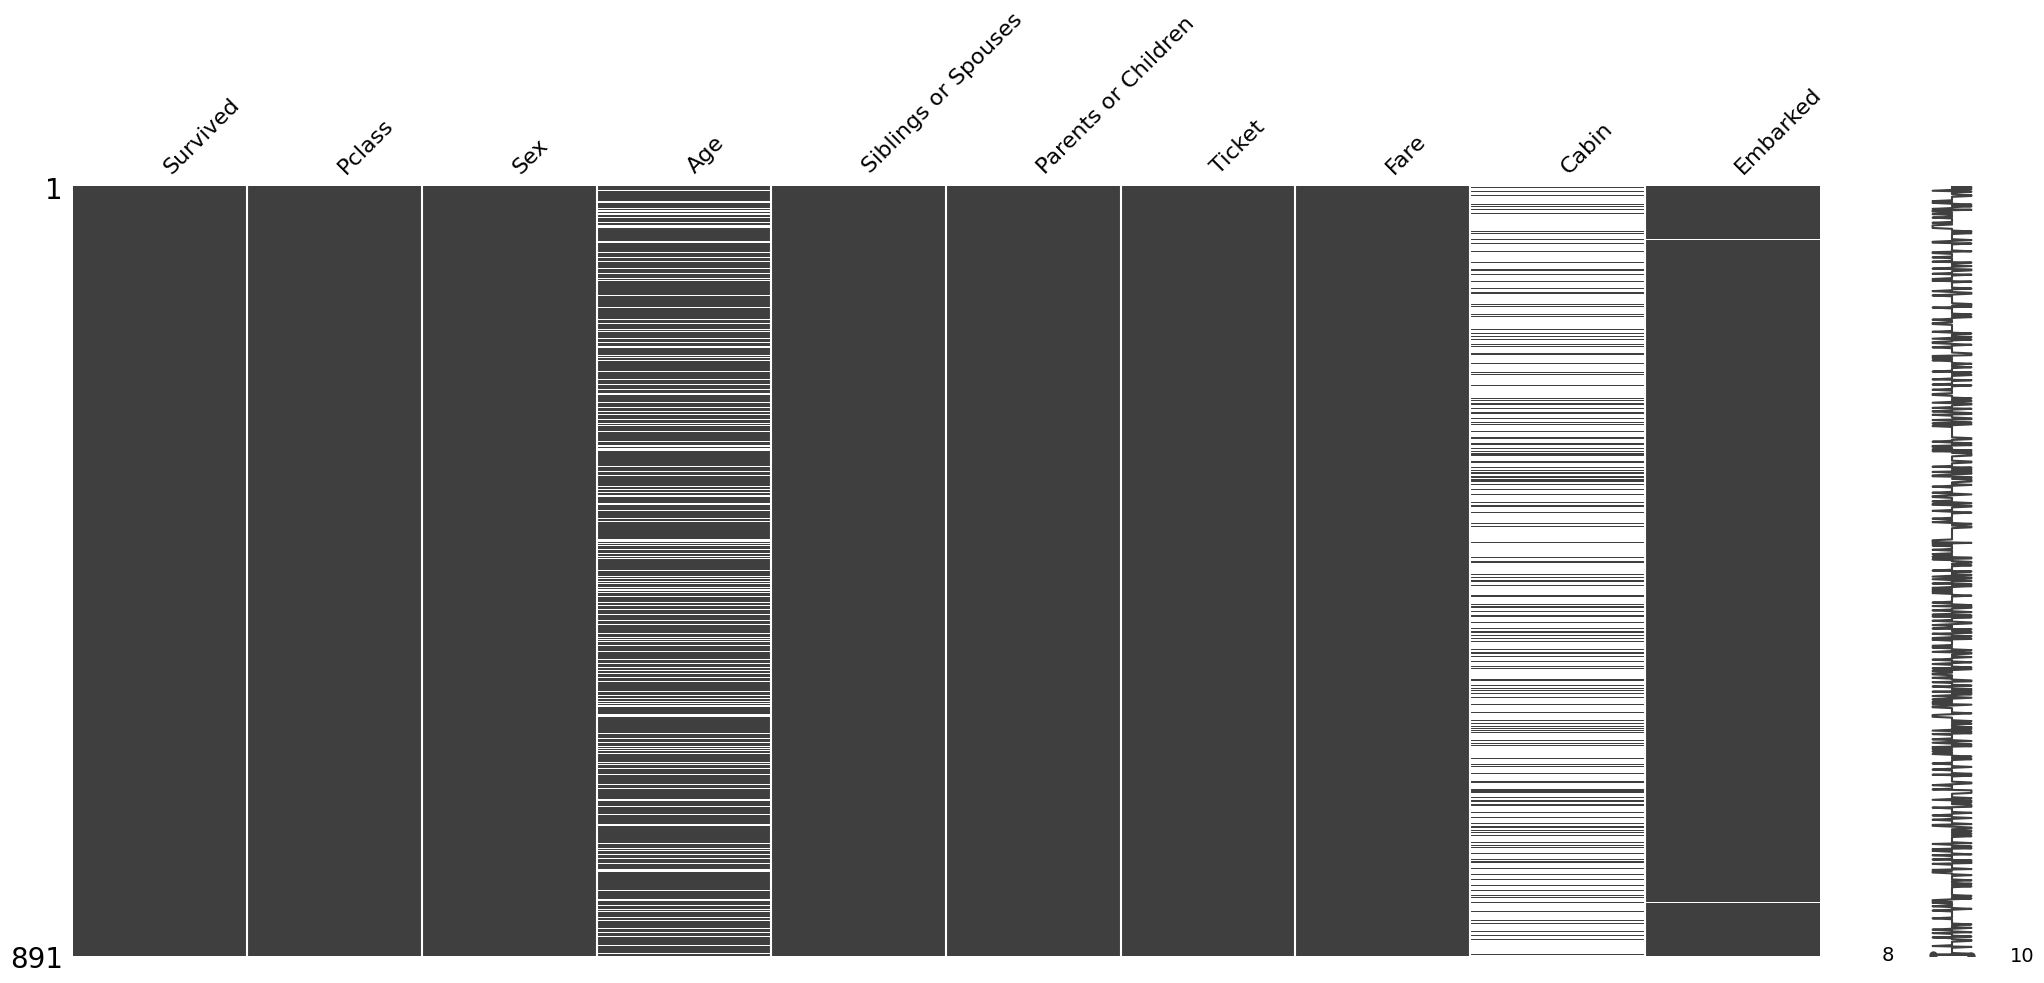

In [228]:
# Visualize the missing values using the missingno package's matrix plot.
msno.matrix(df)

#### Address the null values:

- Fill the null values in categorical columns with a placeholder category called MISSING.


In [229]:
# save list of categorical column name. (Hint: select_dtypes)
categorial_cols = df.select_dtypes('object').columns
categorial_cols

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [230]:
# use the list of cat columns to fill null values with MISSING
df[categorial_cols] = df[categorial_cols].fillna("MISSING")


- Fill the null values in numeric columns with a placeholder value of -1



In [231]:
# save list of numeric column names (Hint: select_dtypes)
numerical_cols = df.select_dtypes('number').columns
numerical_cols

Index(['Survived', 'Pclass', 'Age', 'Siblings or Spouses',
       'Parents or Children', 'Fare'],
      dtype='object')

In [232]:
# use the list of num columns to fill null values with -1
df[numerical_cols] = df[numerical_cols].fillna(-1)

- Use either missingno's matrix plot or Pandas to confirm that there are 0 null values remaining.


In [233]:
# Confirm no more nulls using Pandas
#Option 1 : Find null sum in Categorial Columns and in Numerical Columns
# df[categorial_cols].isna().sum()
# df[numerical_cols].isna().sum()

#OR
# Call the null values again
null_values = df.isna()
null_values

sum_of_null_values = null_values.sum()
sum_of_null_values

,0
Survived,0
Pclass,0
Sex,0
Age,0
Siblings or Spouses,0
Parents or Children,0
Ticket,0
Fare,0
Cabin,0
Embarked,0


<Axes: >

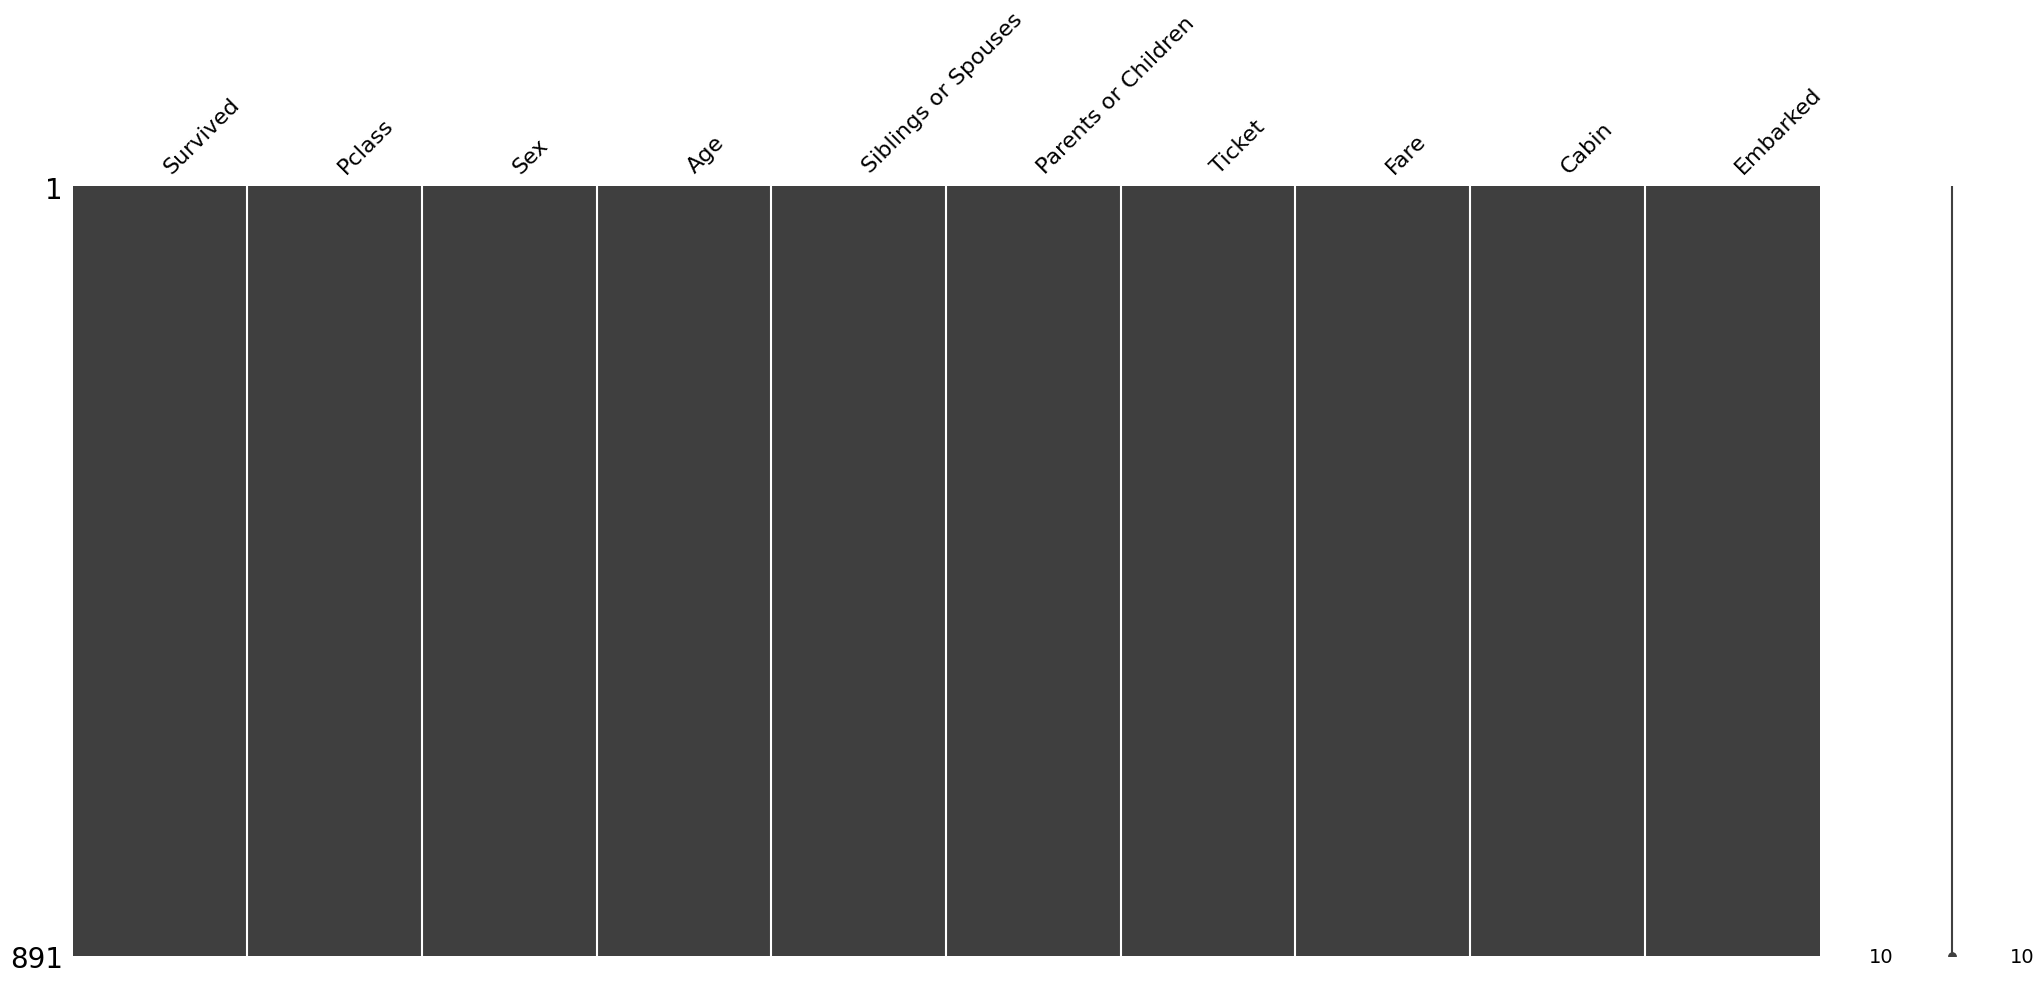

In [234]:
# Confirm no more nulls using using missingno
msno.matrix(df)

## H) Consistent Values

- Check each string column's value counts for inconsistent values.
  - E.g. "Cat" vs "cat", "Y" vs. "Yes"



- Fix/replace the inconsistent values with the values you believe are correct.


- Display the value_counts again to confirm the values are now consistent.
  

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Survived             891 non-null    int64  
 1   Pclass               891 non-null    int64  
 2   Sex                  891 non-null    object 
 3   Age                  891 non-null    float64
 4   Siblings or Spouses  891 non-null    int64  
 5   Parents or Children  891 non-null    int64  
 6   Ticket               891 non-null    object 
 7   Fare                 891 non-null    float64
 8   Cabin                891 non-null    object 
 9   Embarked             891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [236]:
# Save a list of object columns (Hint: select_dtypes)
categorial_cols

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [237]:
# Check the nunique for just the object cols
categorial_cols.nunique()

4

- Note that out of the 4 categorical columns remaining:
  - 2 columns have a small number of categories  (Sex and Embarked)
  - 2 columns have over 100 categories (Ticket and Cabin).

- We do not want to keep categorical features with so many categories.


- **Drop the Ticket column and Cabin column.**

In [238]:
# Drop the columns listed above
df = df.drop(columns=['Ticket','Cabin'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Survived             891 non-null    int64  
 1   Pclass               891 non-null    int64  
 2   Sex                  891 non-null    object 
 3   Age                  891 non-null    float64
 4   Siblings or Spouses  891 non-null    int64  
 5   Parents or Children  891 non-null    int64  
 6   Fare                 891 non-null    float64
 7   Embarked             891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


### For Each Remaining Categorical Column:

- Display the value counts for the column
- Take a note of any values that are not consistent.
- Remove/fix the inconsistent values
- Confirm by checking the value counts again

In [239]:
# Remake the list of string columns (after dropping previous cols)
categorial_cols = df.select_dtypes('object').columns
categorial_cols
# loop through the list of string columns
for column in categorial_cols:
  # print the value counts for the column
  count =  df[column].value_counts()
  print(f"Value counts for {column} : {count}")
  # Print an empty line for readability
  print()

Value counts for Sex : Sex
male      574
female    313
F           4
Name: count, dtype: int64

Value counts for Embarked : Embarked
S             644
C             168
Q              75
MISSING         2
Queenstown      2
Name: count, dtype: int64



**Q: H1) Which columns have inconsistent values that need to be addressed?**
- Your Answer:
  - `Sex`
  - `Embarked`

### Checking & Fixing Consistency: Column 1

In [240]:
# Check for inconsistencies by inspecting the value_counts for Embarked
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,75
MISSING,2
Queenstown,2


In [241]:
# Replace "Queenstown" with "Q"
df['Embarked'] = df['Embarked'].replace({'Queenstown':"Q"})

# Check the value counts again to confirm
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77
MISSING,2


### Checking and Fixing Consistency: Column 2

In [242]:
# # Check for inconsistencies by inspecting the values_counts for Sex
df['Sex'].value_counts()

,count
Sex,
male,574
female,313
F,4


In [243]:
# Replace "F" with "female"
df['Sex'] = df['Sex'].replace({'F':"female"})

# Check the value counts again to confirm
df['Sex'].value_counts()

,count
Sex,
male,574
female,317


## I) Save the Final DataFrame to Csv

- Save the cleaned DataFrame to your Google Drive in the CodingDojo>  01-Fundamentals> Week02>Data folder.
  - Name the file "data-cleaning-core.csv"


In [244]:
# Save the folder + filename as a variable called fpath
filename = "data-cleaning-core.csv"
fpath_out = "/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/data-cleaning-core.csv"

# Use to_csv to save the dataframe using the filename
df.to_csv(fpath_out, index=True)

- Confirm the data was saved correctly.

In [ ]:
#Data Wasn't saved correctly !!

In [245]:
# Read in your new .csv file with Pandas.
saved = pd.read_csv(url)
# Display the info summary.
saved.info()
# Display the first 5 rows.
saved.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   906 non-null    int64  
 1   PassengerId  906 non-null    int64  
 2   Survived     906 non-null    int64  
 3   Pclass       906 non-null    int64  
 4   Name         906 non-null    object 
 5   Sex          906 non-null    object 
 6   Age          723 non-null    float64
 7   SibSp        906 non-null    object 
 8   Parch        906 non-null    int64  
 9   Ticket       906 non-null    object 
 10  Fare         906 non-null    object 
 11  Cabin        207 non-null    object 
 12  Embarked     904 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 92.1+ KB


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.28,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.93,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.10,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


### Save and Submit your work

When the assignment is complete, download your notebook as a .ipynb file and submit it on the learning platform.  